In [ ]:
pip install tweepy

In [4]:
import requests
import tweepy
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import numpy as np

# Google News API

In [2]:
api_key= input('Type in your API Key:')

Type in your API Key:dddb42c378a74d3893ba859bad06635d


Type in the ticker of the stock:
AAPL

Sentiment analysis for AAPL:

Total news articles analyzed: 100

Positive articles: 45 (45.00%)

Neutral articles: 49 (49.00%)

Negative articles: 6 (6.00%)



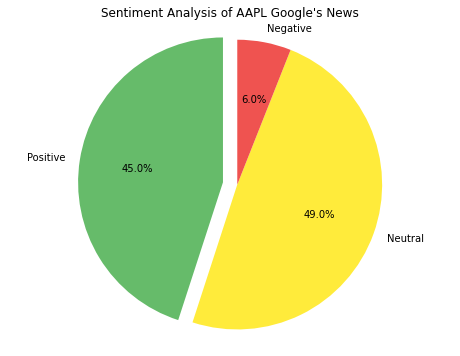

In [6]:
# Function to analyze sentiment of a given text
def get_text_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

    
def plot_sentiment_distribution(sentiment_scores, stock_ticker):
    sentiment_dict = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
    for score in sentiment_scores:
        sentiment_dict[score] += 1

    sentiments = list(sentiment_dict.keys())
    counts = list(sentiment_dict.values())

    colors = ['#66BB6A', '#FFEB3B', '#EF5350']  # Custom colors for positive, neutral, and negative sentiment
    explode = (0.1, 0, 0)  # Explode the positive slice for emphasis

    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=sentiments, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title(f"Sentiment Analysis of {stock_ticker} News")
    plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.show()
    
    
# Function to get news articles related to a stock ticker
def get_stock_sentiment(stock_ticker,api_key):    
    api_endpoint = "https://newsapi.org/v2/everything"    
    params = {
        "q": stock_ticker,
        "language": "en",
        "apiKey": api_key
    }

    # Send request to the API
    response = requests.get(api_endpoint, params=params)
    news_data = response.json()
   
    # Analyze sentiment of each news article
    sentiment_scores = []
    for article in news_data["articles"]:
        sentiment_scores.append(get_text_sentiment(article["title"]))

    # Calculate sentiment statistics
    total_articles = len(sentiment_scores)
    positive_articles = sentiment_scores.count('Positive')
    neutral_articles = sentiment_scores.count('Neutral')
    negative_articles = sentiment_scores.count('Negative')

    # Calculate sentiment percentages
    positive_percentage = (positive_articles / total_articles) * 100
    neutral_percentage = (neutral_articles / total_articles) * 100
    negative_percentage = (negative_articles / total_articles) * 100

    # Print sentiment results
    print(f"\nSentiment analysis for {stock_ticker}:\n")
    print(f"Total news articles analyzed: {total_articles}\n")
    print(f"Positive articles: {positive_articles} ({positive_percentage:.2f}%)\n")
    print(f"Neutral articles: {neutral_articles} ({neutral_percentage:.2f}%)\n")
    print(f"Negative articles: {negative_articles} ({negative_percentage:.2f}%)\n")
    
    plot_sentiment_distribution(sentiment_scores, stock_ticker)

# Example usage
stock_ticker = input("Type in the ticker of the stock:\n")
get_stock_sentiment(stock_ticker, api_key)


# Twitter API

In [ ]:
# Twitter API credentials
consumer_key = input('Type in your consumer key:\n')
consumer_secret = input('Type in your secret key:\n')
access_token = input('Type in your access token:\n')
access_token_secret = input('Type in your access token secret:\n')

In [ ]:
def authenticate_twitter_api():
    # Authenticate to Twitter API
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api

def get_tweet_sentiment(tweet_text):
    analysis = TextBlob(tweet_text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

def analyze_stock_sentiment(api, stock_ticker, num_tweets):
    # Search for tweets containing the stock ticker symbol
    tweets = tweepy.Cursor(api.search_tweets, q=stock_ticker, lang='en').items(num_tweets)

    sentiment_scores = []
    for tweet in tweets:
        sentiment_scores.append(get_tweet_sentiment(tweet.text))

    return sentiment_scores

def plot_sentiment_distribution(sentiment_scores, stock_ticker):
    sentiment_dict = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
    for score in sentiment_scores:
        sentiment_dict[score] += 1

    sentiments = list(sentiment_dict.keys())
    counts = list(sentiment_dict.values())

    colors = ['#66BB6A', '#FFEB3B', '#EF5350']  # Custom colors for positive, neutral, and negative sentiment
    explode = (0.1, 0, 0)  # Explode the positive slice for emphasis

    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=sentiments, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title(f"Sentiment Analysis of {stock_ticker} Tweets")
    plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.show()

def perform_sentiment_analysis(stock_ticker, num_tweets):
    api = authenticate_twitter_api()

    sentiment_scores = analyze_stock_sentiment(api, stock_ticker, num_tweets)
    plot_sentiment_distribution(sentiment_scores, stock_ticker)

    total_tweets = len(sentiment_scores)
    positive_tweets = sentiment_scores.count('Positive')
    neutral_tweets = sentiment_scores.count('Neutral')
    negative_tweets = sentiment_scores.count('Negative')

    positive_percentage = (positive_tweets / total_tweets) * 100
    neutral_percentage = (neutral_tweets / total_tweets) * 100
    negative_percentage = (negative_tweets / total_tweets) * 100

    print(f"Sentiment analysis for {stock_ticker}:\n")
    print(f"Total tweets analyzed: {total_tweets}\n")
    print(f"Positive tweets: {positive_tweets} ({positive_percentage:.2f}%)\n")
    print(f"Neutral tweets: {neutral_tweets} ({neutral_percentage:.2f}%)\n")
    print(f"Negative tweets: {negative_tweets} ({negative_percentage:.2f}%)\n")

# Example usage
stock_ticker = input("Type in the ticker of the stock:\n")
num_tweets = 100
perform_sentiment_analysis(stock_ticker, num_tweets)
